### 38615: Computational Modelling and Machine Learning - 
#### Clustering Assignment HW 2

#### Section 1: Loading data and Preparing data for analysis

In Section 1, we will be loading our dataset and summarizing the main characteristics of our dataset. This will help us understand our dataset better, and prepare the datset for clustering. 

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
#Load the dataset
df = pd.read_csv("/Users/srinidhi/Desktop/hw2_dataset.csv") 
df.head()

,ID,D_0,D_1,D_2,D_3,D_4,D_5,D_6,D_7,D_8,...,D_1014,D_1015,D_1016,D_1017,D_1018,D_1019,D_1020,D_1021,D_1022,D_1023
0,AAEAMMIUQZAASJ-MRXNPFEDSA-N,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,0,1,1,1
1,AAEFNWQXBPYXAC-UHFFFAOYSA-N,1,1,1,1,0,1,1,1,0,...,1,0,1,1,1,0,0,1,1,1
2,AAMHSIWFDKXUMZ-UHFFFAOYSA-N,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,0,0,1,1
3,AAPQXEOSVSLLMB-UHFFFAOYSA-N,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,AARXXEHXOBTROW-UHFFFAOYSA-N,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,0,1,1,1


In [3]:
print(df.shape) #to show the size of the dataset (number of rows and columns)
print(df.columns) #to show the type and number of columns
print(df.index) #to show the number of rows

print(df.dtypes) #to check the column types in the dataset

(969, 1025)
Index(['ID', 'D_0', 'D_1', 'D_2', 'D_3', 'D_4', 'D_5', 'D_6', 'D_7', 'D_8',
       ...
       'D_1014', 'D_1015', 'D_1016', 'D_1017', 'D_1018', 'D_1019', 'D_1020',
       'D_1021', 'D_1022', 'D_1023'],
      dtype='object', length=1025)
RangeIndex(start=0, stop=969, step=1)
ID        object
D_0        int64
D_1        int64
D_2        int64
D_3        int64
           ...  
D_1019     int64
D_1020     int64
D_1021     int64
D_1022     int64
D_1023     int64
Length: 1025, dtype: object


Since there are about 1025 columns, it is difficult to see how many categorical and numerical variables are there in the dataset. So we will be implementing the code below to find out.

In [4]:
#Select numerical and categorical variables
numerical_columns = df.select_dtypes(include=[int,float]).columns
categorical_columns= df.select_dtypes('object').columns

#Count the number of numerical and categorical variables
print(len(numerical_columns)) 
print(len(categorical_columns))

1024
1


From the above output, we can see that there are 1024 numerical variables and 1 categorical variable, which we have already identified it to be "ID" from our previous output.

To prepare our dataset for clustering, we will be removing any categorical variables from the dataset as clustering only works on numerical variables. Since "ID" is the only categorical variable, we will be removing it from our dataset. 

In [5]:
#Drop the ID column
df = df.drop(['ID'], axis=1)

#Check that the column has been dropped
df.head() 

,D_0,D_1,D_2,D_3,D_4,D_5,D_6,D_7,D_8,D_9,...,D_1014,D_1015,D_1016,D_1017,D_1018,D_1019,D_1020,D_1021,D_1022,D_1023
0,1,1,1,1,1,1,1,0,1,0,...,1,1,1,1,1,1,0,1,1,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,1,1,1,0,0,1,1,1
2,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,0,0,1,1
3,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,0,1,0,...,1,1,1,1,1,1,0,1,1,1


From a quick scan of our dataset, we can see that all our numerical variables seem to be binary variables. To confirm that all variables are binary, we will be implementing the code below. 

From the output below, we can see that there are no variable with more than 2 unique values - proving that the values are either 0 or 1 for all numerical variables. Hence, we can confirm that our numerical variable are all binary.

In [6]:
#Check if the variables are binary
print(len(df.nunique()[lambda x: x <= 2]))
print(len(df.nunique()[lambda x: x > 2]))

1024
0


In [47]:
vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]
print (vars_with_na)

[]


From the above, we can see that there are no missing values - so don't need to clean or remove any data. We can proceed with our clustering techniques as intended.

#### Section 2: Performing K-means Clustering

K-means clustering is one of the simplest and popular unsupervised machine learning algorithms. It can be used to find groups/clusters which have not been explicitly labeled in the data. This can helps us to identify unknown groups in complex data sets.

First, let's start off with implementing our k-means algorithm. For our algorithm, we will be using the elbow-method and the KneeLocator function to identify the optimal number of clusters (k). 

In [7]:
from sklearn.cluster import KMeans

# Initialize an empty list to store distortion values
distortions = []

# Define the range of cluster numbers to explore (from 1 to 30 clusters)
K = range(1, 31)

# Loop through different cluster numbers
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
    
    # Fit the KMeans model to the data in 'df'
    kmeans.fit(df)
    
    # Calculate and store the distortion (inertia) value for this 'k'
    distortions.append(kmeans.inertia_)

In [8]:
# Find the optimal number of clusters (elbow point) using KneeLocator
from kneed import KneeLocator
kneedle = KneeLocator(K, distortions, curve="convex", direction="decreasing")
optimal_k = kneedle.elbow

print(f"Optimal number of clusters (k): {optimal_k}")

Optimal number of clusters (k): 10


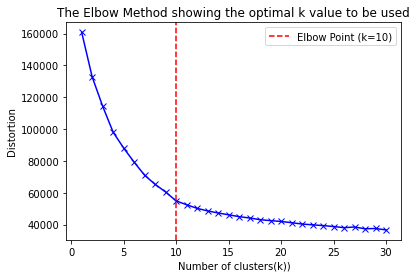

In [9]:
#Plot the graph to find the optimal number of clusthers through the elbow point 
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters(k))')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k value to be used')
plt.axvline(x=optimal_k, color='r', linestyle='--', label='Elbow Point (k={})'.format(optimal_k))
plt.legend()

plt.show()

In [42]:
#Perform k-means clusetering on our data
kmeans = KMeans(n_clusters = optimal_k, random_state=0)
labels1 = kmeans.fit_predict(df)

#Obtain cluster labels for each data point
df["Clusters.EC"] = kmeans.labels_
df.head()

,D_0,D_1,D_2,D_3,D_4,D_5,D_6,D_7,D_8,D_9,...,D_1015,D_1016,D_1017,D_1018,D_1019,D_1020,D_1021,D_1022,D_1023,Clusters.EC
0,1,1,1,1,1,1,1,0,1,0,...,1,1,1,1,1,0,1,1,1,2
1,1,1,1,1,0,1,1,1,0,0,...,0,1,1,1,0,0,1,1,1,3
2,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,0,0,1,1,7
3,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,6
4,1,1,1,1,1,1,1,0,1,0,...,1,1,1,1,1,0,1,1,1,4


In [11]:
#Prepare our data for tSNE by standardizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 

df_scaled = scaler.fit_transform(df)

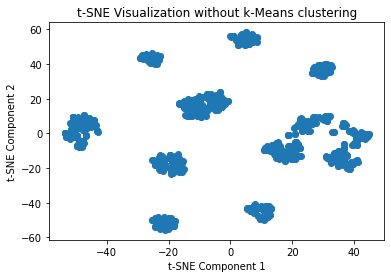

In [12]:
#Perform tSNE on our scaled data
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
tsne_data = tsne.fit_transform(df_scaled)
tsne_df = pd.DataFrame(data={'tSNE1': tsne_data[:, 0], 'tSNE2': tsne_data[:, 1]})

#Create a scatterplot to visualize the t-SNE results
def plot_tsne():
    plt.scatter(tsne_df['tSNE1'], tsne_df['tSNE2'])
    plt.title("t-SNE Visualization without k-Means clustering")
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.show()

plot_tsne()

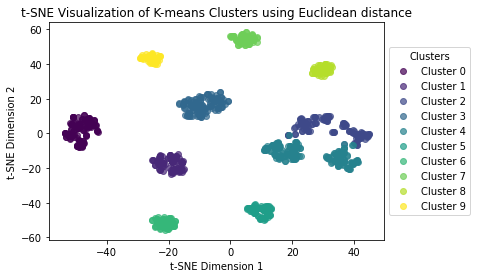

In [43]:
#Define cluster labels and colors
cluster_labels1 = np.unique(labels1)
colors1 = plt.cm.viridis(np.linspace(0, 1, len(cluster_labels1)))

# Plot data points for each cluster with different colors
for label, color in zip(cluster_labels1, colors1):
    cluster_points = tsne_data[labels1 == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=[color], label=f'Cluster {label}', alpha=0.7)
        
plt.title('t-SNE Visualization of K-means Clusters using Euclidean distance')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
    
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
legend.set_title('Clusters')
plt.show()

In [14]:
from sklearn.metrics import silhouette_score

silhouette_avg1 = silhouette_score(df, labels)
print(f"Silhouette Score: {silhouette_avg1}")

Silhouette Score: 0.4014306036408094


From the output above, we can see that the silhouette score is not very high. A good silhouette score typically falls within the range of -1 to 1. The closer the value is to 1, then the better is the cluster separation. 

Since the score is below 0.5, we can conclude that there is some reasonable level of clustering, but there may be some overlap or ambiguity in the clustering.

#### Section 3: Performing a different clustering method (DBScan)

For this section, we will be doing DBScan (Density-Based Spatial Clustering of Applications with Noise). This is a density-based clustering algorithm commonly used in machine learning and data analysis. 

Since we are not sure what is the optimal level of eps and min_samples values to use, we will be calculating the silhouette score for different combinations of eps and min_samples. We will then identify the parameter values that result in better silhouette scores. Our  goal here is to find the best combination that maximizes the silhouette score.

In [15]:
from sklearn.cluster import DBSCAN

# Define a range of eps and min_samples values to search
eps_values = np.arange(0.1, 10,0.1)
min_samples_values = range(2, 10)

# Initialize variables to store the best hyperparameters and silhouette score
best_eps = None
best_min_samples = None
best_silhouette_score2 = -1

# Perform grid search to find the best hyperparameters
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df)
        
        # Check if there's more than one cluster
        if len(set(labels)) > 1:
            silhouette_avg = silhouette_score(df, labels)
            
            # Update the best hyperparameters if the silhouette score is higher
            if silhouette_avg > best_silhouette_score2:
                best_silhouette_score2 = silhouette_avg
                best_eps = eps
                best_min_samples = min_samples

print("Best eps:", best_eps)
print("Best min_samples:", best_min_samples)
print("Best Silhouette Score:", best_silhouette_score2)

Best eps: 9.4
Best min_samples: 3
Best Silhouette Score: 0.39109716295184155


From the output above, we can see that the best Silhouette Score is seen when the epsilon value is 9.4 and minimum_samples is 3. This means that the minimum number of data points required to form a cluster will be 3, and the size of the neighborhood around each data point is around 9.4. 

However, we can see that the silhouette score is still low (lower than what we had achieved for k-means clustering). Based on the conditions we had defined above, this is the best silhouette score that DBScan can find. So we will be using the associated eps and min_samples value in our following analysis. 

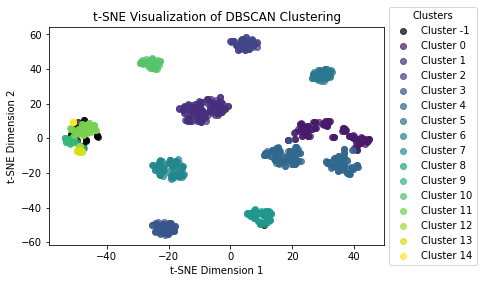

In [16]:
# Instantiate and fit the DBSCAN model to your data
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples).fit(df)
labels = dbscan.labels_  

# Define cluster labels and colors
cluster_labels2 = np.unique(labels)
colors2 = plt.cm.viridis(np.linspace(0, 1, len(cluster_labels2)))

# Plot the data points with different colors for each cluster (noise points in black)
for label, color in zip(cluster_labels2, colors2):
    if label == -1:
        # Noise points are black
        color = [0, 0, 0, 1]  # Black color
    cluster_points = tsne_data[labels == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=[color], label=f'Cluster {label}', alpha=0.7)

legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
legend.set_title('Clusters')  # Set the legend title
plt.title('t-SNE Visualization of DBSCAN Clustering')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

#### Section 4: Trying clustering with another distance metric (e.g. Cosine, Jaccard, etc.)

For this section, we will be using Agglomerative Clustering. This is a hierarchical clustering algorithm that can be applied to a variety of distance metrics, including non-Euclidean ones.

We will not be using K-means clustering here because it does not really perform well with non-Euclidean distance metric. K-means is designed to best work with Euclidean distance metrics. 

Given that Agglomerative Clustering is versatile and can be applied to different distance metrics and linkages, we will experiment with different linkage and distance metrics to find the best fit for our data. We will be calculating the silhouette score for different combinations and then identify the parameter values that result in the better silhouette scores. This method is similar to what we did for DBScan Clustering. 

In [17]:
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
from sklearn.model_selection import ParameterGrid
def agglomerative_clustering_silhouette(df, n_clusters, distance_metric, linkage):
    distance_matrix = squareform(pdist(df, metric=distance_metric))
    clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage, affinity='precomputed')
    cluster_labels = clustering.fit_predict(distance_matrix)
    silhouette_avg = silhouette_score(df, cluster_labels)
    return silhouette_avg

# Define the grid of hyperparameters to search
param_grid = {
    'n_clusters': range (2,21),  # Vary the number of clusters as needed
    'distance_metric': ['manhattan', 'cosine', 'jaccard'],  # Distance metrics to try
    'linkage': ['complete', 'average', 'single']  # Linkage methods to try
}

best_score3 = -1  # Initialize with a low value
best_params = {}

# Perform grid search
for params in ParameterGrid(param_grid):
    n_clusters = params['n_clusters']
    distance_metric = params['distance_metric']
    linkage = params['linkage']
    
    # Perform agglomerative clustering and calculate silhouette score
    try:
        silhouette_avg = agglomerative_clustering_silhouette(df, n_clusters, distance_metric, linkage)
    
        # Update best parameters if a higher silhouette score is achieved
        if silhouette_avg > best_score3:
            best_score3 = silhouette_avg
            best_params = params
    except ValueError:
        continue  # Skip combinations that raise a ValueError

# Print the best parameters and silhouette score
print("Best Parameters:", best_params)
print("Best Silhouette Score:", best_score3)

Best Parameters: {'distance_metric': 'cosine', 'linkage': 'complete', 'n_clusters': 20}
Best Silhouette Score: 0.3323528405251001


From our parameters search, we can see that the best silhouette score is achieved when agglomerative clustering is used with cosine distnce metric and complete linkage. We also used our algorithm above to compute the optimal number of clusters, and for this particular clustering 20 clusters is the optimal value. We will be using these parameters in our following analysis. 

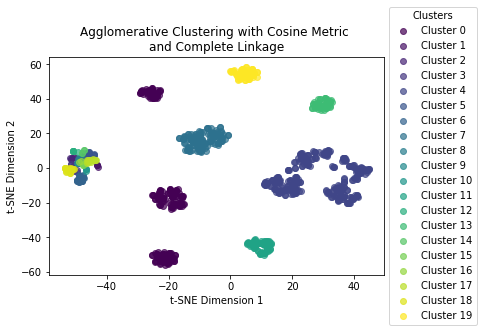

In [24]:
# Calculate cosine distance and convert to a distance matrix
cosine_distances = pdist(df, metric='cosine')
distance_matrix = squareform(cosine_distances)

# Perform Agglomerative Clustering with cosine distance and complete linkage
agg_clustering = AgglomerativeClustering(n_clusters=20, affinity='precomputed', linkage='complete')
cluster_labels3 = agg_clustering.fit_predict(distance_matrix)

# Generate a color map using plt.cm.viridis
colors3 = plt.cm.viridis(np.linspace(0, 1, len(np.unique(cluster_labels3))))  # Use unique cluster labels

# Plot the clusters with colors from the colormap

for label, color in zip(np.unique(cluster_labels3), colors3):
    plt.scatter(tsne_data[cluster_labels3 == label, 0], tsne_data[cluster_labels3 == label, 1], c=[color], label=f'Cluster {label}', alpha=0.7)

plt.title('Agglomerative Clustering with Cosine Metric \nand Complete Linkage')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

# Add a legend to the plot
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
legend.set_title('Clusters')
plt.show()

#### Section 5: Comparing results with respect to the different clustering methods and distance metrics used

In this section, I will be summarizing the information we have obtained above and cateogorizing them into the different clusteting methods we have used for easier comparison and analsyis. 

First, we will create a table to summarize the number of clusters and silhouette scores we obtaiend for each clustering method. Next, we will be creating side-by-side subplots of all the tSNE visualization graphs we plotted for each clustering method. 

In [19]:
# Create a DataFrame
data = {
    "Clustering Type": ["K-Means Clustering", "DBScan Clustering", "Agglomerative Clustering"],
    "Number of Clusters": ["10","15","20"],
    "Silhouette Score": [silhouette_avg1, best_silhouette_score2, best_score3]
}

df_results = pd.DataFrame(data)
df_results = df_results.sort_values(by="Silhouette Score", ascending=False)

print(df_results)

            Clustering Type Number of Clusters  Silhouette Score
0        K-Means Clustering                 10          0.401431
1         DBScan Clustering                 15          0.391097
2  Agglomerative Clustering                 20          0.332353


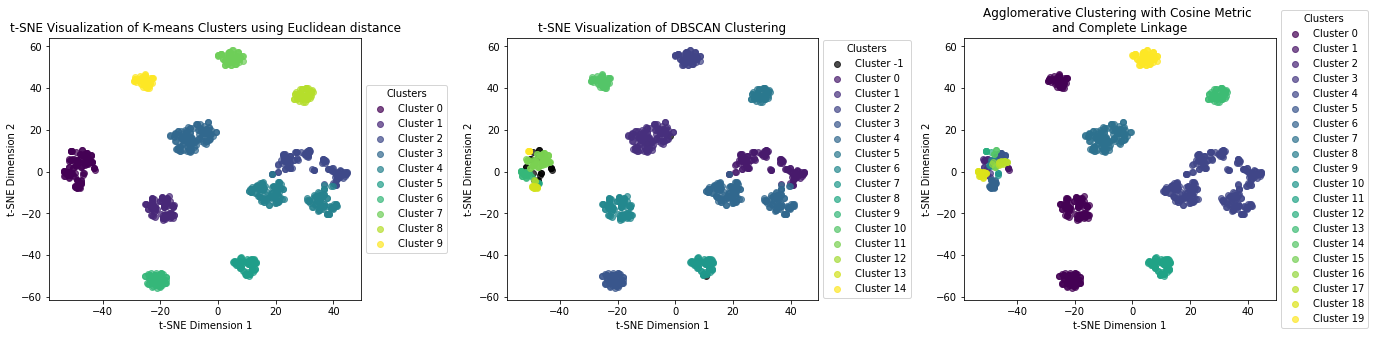

In [45]:
def plot_kmeans():
    for label, color in zip(cluster_labels1, colors1):
        cluster_points = tsne_data[labels1 == label]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=[color], label=f'Cluster {label}', alpha=0.7)
        
    plt.title('t-SNE Visualization of K-means Clusters using Euclidean distance')
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    
    legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    legend.set_title('Clusters')

def plot_dbscan():
    for label, color in zip(cluster_labels2, colors2):
        if label == -1:
            # Noise points are black
            color = [0, 0, 0, 1]  # Black color
        cluster_points = tsne_data[labels == label]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=[color], label=f'Cluster {label}', alpha=0.7)

    legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    legend.set_title('Clusters')  # Set the legend title
    plt.title('t-SNE Visualization of DBSCAN Clustering')
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')

def plot_aggclust():
    for label, color in zip(np.unique(cluster_labels3), colors3):
        plt.scatter(tsne_data[cluster_labels3 == label, 0], tsne_data[cluster_labels3 == label, 1], c=[color], label=f'Cluster {label}', alpha=0.7)

    plt.title('Agglomerative Clustering with Cosine Metric \nand Complete Linkage')
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')

    # Add a legend to the plot
    legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    legend.set_title('Clusters')

plt.figure(figsize=(19.2, 4.8))

# Create and display the first plot
plt.subplot(1, 3, 1)
plot_kmeans()

# Create and display the second plot
plt.subplot(1, 3, 2)
plot_dbscan()

# Create and display the third plot
plt.subplot(1, 3, 3)
plot_aggclust()

# Adjust the layout of subplots for better spacing
plt.tight_layout()

# Show the combined plots with subplots side by side
plt.show()

From the output above, you can see that the Silhouette Score is the highest for K-Means Clustering, and the lowest for Agglomerative Clustering. This means that the quality of clusters produced by K-Means is the highest compared to the other clustering methods that we had used. 

When we look at the tSNE graph without any clustering methods, we can see that visually there are about 10 clusters - which is similar to the number of clusters we got for K-Means Clustering. However, for DBScan Clustering and Agglomerative Clustering you can see that the optimal number of clusters found is above 10. And this could result in overfitting. 

Clustering algorithms may overfit the data by identifying clusters that are not supported by the underlying data distribution. This could happen when clustering algorithms are overly sensitive to the data. They may detect subtle variations in the data, causing oversplitting into smaller clusters which may not be meaningful or interpretable.

The over-splitting can particularly be observed in the middle leftmost cluster, where you can see some sort of nested clustering. Nested Clusters are formed when there are numerous smaller clusters within one large cluster. The presence of nested clusters can be a characteristic of the data or an outcome of the clustering algorithm's behavior. In our case, since we did not observe any nested clusters in our k-Means clustering, this formation of nested-clusters could probably be due to the behaviour of the different clustering methods we used. 

Moreover, DBScan Clustering has the ability to detect noise in the data. Data points that do not belong to any cluster and do not meet the density criteria are considered noise points. If you look at the tSNE plot for DBScan Clustering, you can see that the points that were identified as noise/outliers were found in the nested cluster. This could also potentially be a result of overfitting as well, as the algorithm is unable to group all the data points into that many clusters. 

Since there were no noise/outliers detected in any other clusters, we can assume that it is not a data quality/noise issue that is influencing the clustering results and creating these nested clusters. 

Overall, we can see that the positions of the clusters are similar across all 3 plots. Except the nested cluster, we can see that the other clusters identified for DBScan Clustering is similar to the ones identified for KMeans Clustering. For Agglomerative Clustering, the clusters identified are quite different. For example, we can see that there are 3 clusters of the same colour ("dark purple") around x=-20. Given how far apart these clusters are, we can see that this might not be the most appropriate cluster mapping for our dataset. 

#### Section 6: Conclusion

Overall, for our dataset I would say that k-Means clustering is the best fit for our dataset based on three different methods we have tried. However, it is also important to take note that K-means clustering is not inherently well-suited for binary data as it relies on the average of data points, and binary data does not have a natural notion of mean in the same way continuous data does. 

Although we used silhouette scores as an evaluation metric to compare between the different clustering methods, we should take note that the interpretation of silhouette scores can be different for binary data compared to continuous data. In binary data, a silhouette score near 0 may not necessarily indicate poor clustering quality. It can be challenging to achieve high silhouette scores with binary data due to the discrete nature of the features.

These are some things we need to take into consideration when evaluating which clustering method to use. It is important to strike a balance between data-driven clustering results and the interpretability and meaningfulness of the clusters in the context of our dataset.